# EDA

In [63]:
import pandas as pd
import json
import numpy as np
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [65]:
# 導入資料
train_df = pd.read_pickle('../data/Train_by_postoal_code_without_review_pointwise_v3_3.pkl')
test_df = pd.read_pickle('../data/Test_by_postoal_code_without_review_pointwise_v3_3.pkl')
# all_df = pd.read_pickle('../Data/restaurant_only.pkl')

In [66]:
train_df.shape , test_df.shape

((5766, 27), (3473, 27))

## 計算正負樣本比例

In [41]:
def cal_pos_neg(df):
    
    pos_neg_dict = {}
    
    for i in Counter(df.name):
        tmp = df[df.name == i]
        pos = tmp[tmp.relevance !=0]
        neg = tmp[tmp.relevance ==0]
        pos_neg_dict[i]={}
        pos_neg_dict[i]['pos_cnt'] = len(pos)
        pos_neg_dict[i]['neg_cnt'] = len(neg)
        
    return pos_neg_dict

In [29]:
train_pos_neg_dict = cal_pos_neg(train_df)
test_pos_neg_dict = cal_pos_neg(test_df)

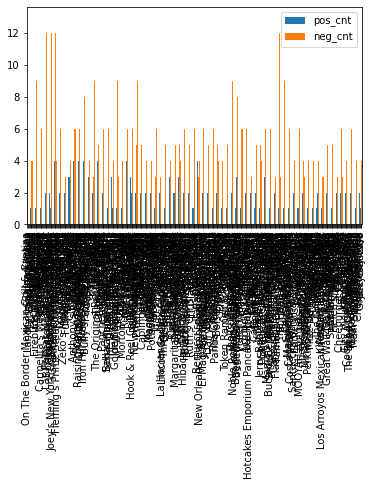

In [30]:
plt.rcParams['figure.figsize'] = [30, 10]

# pd.DataFrame(train_pos_neg_dict).T.plot.bar()
pd.DataFrame(test_pos_neg_dict).T.plot.bar()

plt.show()

In [ ]:
list(train_df.attributes[0])[0]

## 計算距離

In [ ]:
list1 = [1,2,3]
list2 = [4,5,7]
result = np.subtract(list1, list2)
print(result,np.mean(result))

In [50]:
def cal_distance(df):
    
    dist_dict = {}
    
    for i in Counter(df.name):
        dist_dict[i]={}
        dist_list = []
        tmp = df[df.name == i]
        pos_tmp = tmp[tmp.relevance != 0]
        neg_tmp = tmp[tmp.relevance ==0]
#         print(list(pos_tmp.postal_code))
#         print(list(neg_tmp.postal_code))
        for pos_postal in list(pos_tmp.postal_code):
            for neg_postal in list(neg_tmp.postal_code):
                dist_list.append(abs(int(pos_postal)-int(neg_postal)))
        
        dist_dict[i]['max_dist'] = max(dist_list)
        dist_dict[i]['min_dist'] = min(dist_list)
        dist_dict[i]['mean_dist'] = np.mean(dist_list)
        dist_dict[i]['pos_cnt'] = len(pos_tmp)
        dist_dict[i]['neg_cnt'] = len(neg_tmp)
        
    return dist_dict

In [67]:
train_dist_dict = cal_distance(train_df)
test_dist_dict = cal_distance(test_df)

In [68]:
round(pd.DataFrame(train_dist_dict).T.describe(),3)

,max_dist,min_dist,mean_dist,pos_cnt,neg_cnt
count,405.000,405.000,405.000,405.000,405.000
mean,10620.136,49.630,4647.877,2.805,11.432
std,18582.199,73.303,8005.933,1.470,5.745
min,34.000,1.000,15.750,2.000,3.000
25%,127.000,1.000,78.125,2.000,8.000
50%,268.000,16.000,200.500,2.000,8.000
75%,14642.000,73.000,6997.000,3.000,12.000
max,74189.000,463.000,35234.875,8.000,32.000


In [69]:
round(pd.DataFrame(test_dist_dict).T.describe(),3)

,max_dist,min_dist,mean_dist,pos_cnt,neg_cnt
count,405.000,405.000,405.000,405.000,405.000
mean,6015.963,72.464,2882.079,1.758,6.817
std,13715.427,100.597,6519.699,0.865,3.208
min,3.000,1.000,2.000,1.000,2.000
25%,90.000,4.000,59.500,1.000,5.000
50%,169.000,40.000,126.600,2.000,6.000
75%,2125.000,92.000,943.361,2.000,8.000
max,81434.000,828.000,37850.375,4.000,16.000


In [ ]:
plt.rcParams['figure.figsize'] = [30, 10]
d = train_dist_dict
# d = test_dist_dict
lists = sorted(d.items(),key=lambda kv: kv[1], reverse=True) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [ ]:
def get_dist_cnt(dict_):
    
    grouped_dist = {}
    
    grouped_dist['0_1000']=0
    grouped_dist['1000_5000']=0
    grouped_dist['5000_10000']=0
    grouped_dist['10000_30000']=0
    grouped_dist['30000_60000']=0
    grouped_dist['60000_']=0
    
    for k ,v in dict_.items():
        if v < 1000:
            grouped_dist['0_1000']+=1
        elif v>=1000 and v < 5000:
            grouped_dist['1000_5000']+=1
        elif v>=5000 and v < 10000:
            grouped_dist['5000_10000']+=1
        elif v>=10000 and v < 30000:
            grouped_dist['10000_30000']+=1
        elif v>=30000 and v < 60000:
            grouped_dist['30000_60000']+=1
        else:
            grouped_dist['60000_']+=1  
    return grouped_dist

In [ ]:
train_grouped_dist = get_dist_cnt(train_dist_dict)
v = get_dist_cnt(test_dist_dict)

In [ ]:
plt.rcParams['figure.figsize'] = [30, 10]
d = train_grouped_dist
# d = test_dist_dict
lists = sorted(d.items(),key=lambda kv: kv[1], reverse=True) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x, y)
plt.show()

In [ ]:
# Importing libraries
import math

# Placing the plots in the plane
plot1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
plot2 = plt.subplot2grid((3, 3), (1, 0), rowspan=2)



# Plot for exponent
lists_train = sorted(train_grouped_dist.items(),key=lambda kv: kv[1], reverse=True) # sorted by key, return a list of tuples
x_train, y_train = zip(*lists_train) # unpack a list of pairs into two tuples
plot1.bar(x_train, y_train)
plot1.set_title('Train')

# Plot for Square
lists_test = sorted(test_grouped_dist.items(),key=lambda kv: kv[1], reverse=True) # sorted by key, return a list of tuples
x_test, y_test = zip(*lists_test) # unpack a list of pairs into two tuples
plot2.bar(x_test, y_test)
plot2.set_title('Test')

# Packing all the plots and displaying them
plt.tight_layout()
plt.show()
